<h1>A look at masked data and what is available in X-SAPR2 files</h1>

In [11]:
#all our favourite imports
from matplotlib import pyplot as plt
from __future__ import print_function
import numpy as np
from mpl_toolkits.basemap import Basemap
import pickle
import pyart
from netCDF4 import num2date
import pytz
import cartopy
#warnings.filterwarnings("ignore")
%matplotlib inline

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 08:28:37.049577. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [38]:
#read in a HDF5 file from X-SAPR2. Print out field keys and lat/lon
filename = '/data/azores_pyart/enaxsaprsecD1.00.20170625.212006.raw.sec_XSAPR2_20170625212006_00.h5'
ena_radar = pyart.aux_io.gamic_hdf5.read_gamic(filename)
print(ena_radar.latitude['data'], ena_radar.longitude['data'])
print(ena_radar.fields.keys())


[ 39.090955] [-28.026747]
dict_keys(['differential_phase', 'corrected_differential_phase', 'specific_differential_phase', 'normalized_coherent_power', 'cross_correlation_ratio', 'reflectivity', 'spectrum_width', 'differential_reflectivity', 'corrected_reflectivity', 'corrected_velocity', 'corrected_differential_reflectivity'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 08:54:20.404017. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [51]:
def plot_xsapr2(radar, field = 'reflectivity', cmap=None,
               vmin=None, vmax=None):
    # Lets get some geographical context
    lats = radar.gate_latitude
    lons = radar.gate_longitude

    min_lon = lons['data'].min()
    min_lat = lats['data'].min()
    max_lat = lats['data'].max()
    max_lon = lons['data'].max()

    print('min_lat:', min_lat, ' min_lon:', min_lon, 
          ' max_lat:', max_lat, ' max_lon:', max_lon)

    sweep = 0
    index_at_start = radar.sweep_start_ray_index['data'][sweep]
    time_at_start_of_radar = num2date(radar.time['data'][index_at_start], 
                                      radar.time['units'])
    GMT = pytz.timezone('GMT')
    local_time = GMT.fromutc(time_at_start_of_radar)
    fancy_date_string = local_time.strftime('%A %B %d at %I:%M %p %Z')
    print(fancy_date_string)
    fig = plt.figure(figsize = [15,10])
    display = pyart.graph.RadarMapDisplayCartopy(radar)
    lat_0 = display.loc[0]
    lon_0 = display.loc[1]

    # Main difference! Cartopy forces you to select a projection first!
    projection = cartopy.crs.Mercator(
                    central_longitude=lon_0,
                    min_latitude=min_lat, max_latitude=max_lat)

    title = 'X-SAPR2 \n' + fancy_date_string

    display.plot_ppi_map(
        field, 0, colorbar_flag=False,
        title=title,
        projection=projection,
        min_lon=min_lon, max_lon=max_lon, min_lat=min_lat, max_lat=max_lat,
        vmin=vmin, vmax=vmax, cmap=cmap)

    lb = display._get_colorbar_label(field)
    cb = plt.colorbar(display.plots[0], shrink=.7, aspect=30, pad=0.01)
    cb.set_label(lb)

    # Mark the radar
    display.plot_point(lon_0, lat_0, label_text='X-SAPR2')

    # Plot some lat and lon lines
    gl = display.ax.gridlines(draw_labels=True,
                              linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_right = False

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:05:14.652371. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


Plot the PPI from the lowest tilt

min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


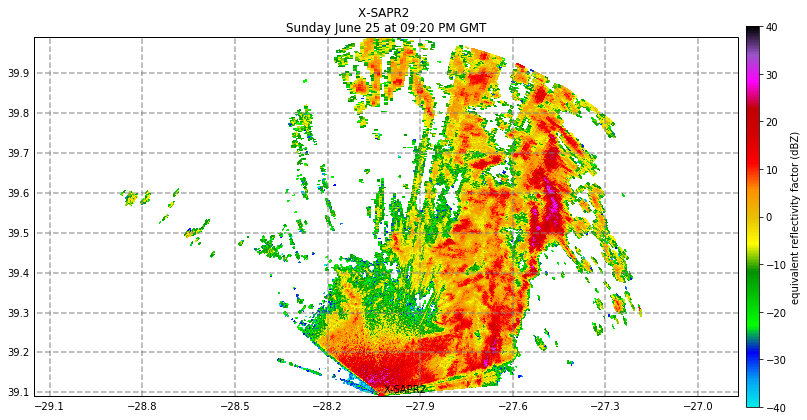

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:05:16.917625. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [52]:
plot_xsapr2(ena_radar, field = 'reflectivity', vmin=-40, vmax=40)

Data looks masked. 

Lets re-open but get **ALL** the fields

In [39]:
ena_radar2 = pyart.aux_io.gamic_hdf5.read_gamic(filename, file_field_names=True)
print(ena_radar2.latitude['data'], ena_radar2.longitude['data'])
print(ena_radar2.fields.keys())

[ 39.090955] [-28.026747]
dict_keys(['CWh', 'RHOHV', 'Zv', 'CMAP', 'Vh', 'KDP', 'SQIh', 'SNRv', 'SQIv', 'UnVv', 'PHIDP', 'UZv', 'ZDR', 'Z', 'Wv', 'AZh', 'Zh', 'SNRh', 'Wh', 'UZ', 'AZDR1', 'AZDR', 'URHOHV', 'Vv', 'UZDR', 'UZDR1', 'CLASS', 'UZh', 'ZDR1', 'CWv', 'UPHIDP', 'UnVh'])


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 08:54:29.996625. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


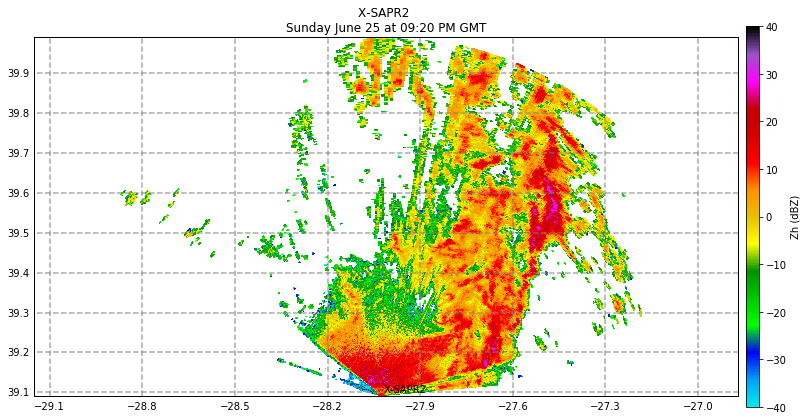

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:05:29.139521. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [53]:
plot_xsapr2(ena_radar2, field = 'Zh', cmap=pyart.graph.cm.NWSRef, vmin=-40, vmax=40)

min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


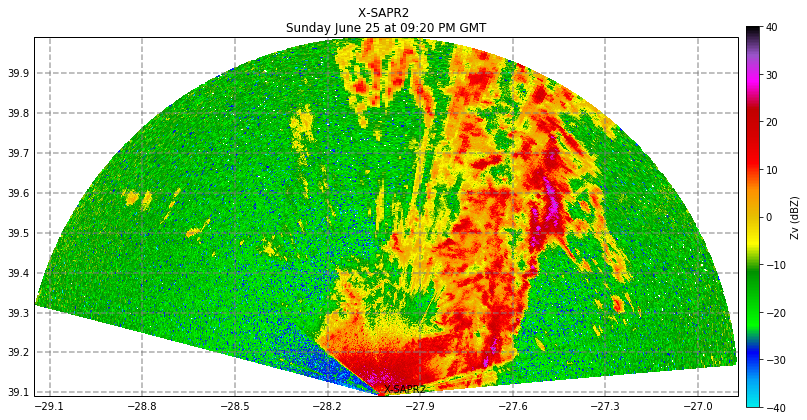

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:05:39.921132. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [54]:
plot_xsapr2(ena_radar2, field = 'Zv', cmap=pyart.graph.cm.NWSRef, vmin=-40, vmax=40)

Yay! Unmasked data.. 

In [55]:
nyq = ena_radar2.instrument_parameters['nyquist_velocity']['data'][0]
print(nyq)

10.99


/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:06:20.315883. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


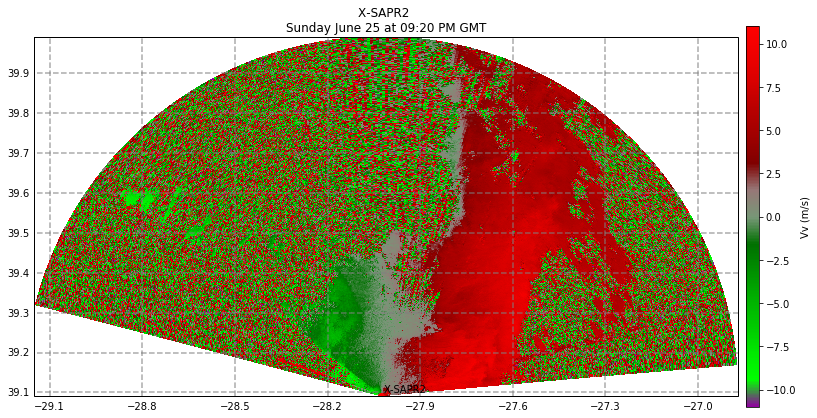

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:06:46.247834. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [56]:
plot_xsapr2(ena_radar2, field = 'Vv', cmap=pyart.graph.cm.NWSVel, vmin=-1.0*nyq, vmax=nyq)

min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


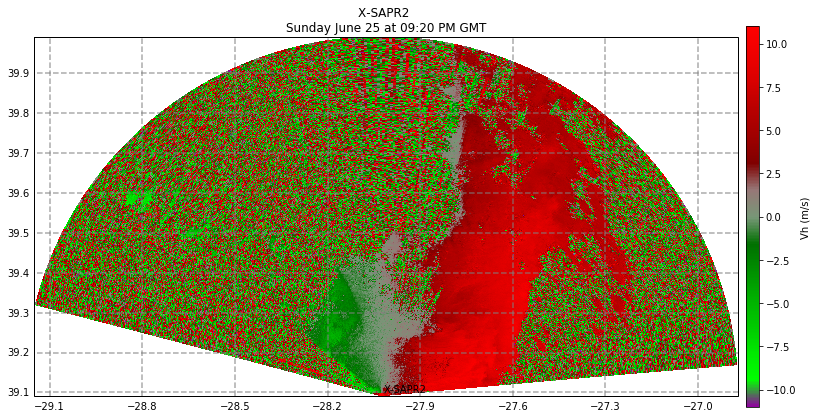

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:07:06.770384. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [57]:
plot_xsapr2(ena_radar2, field = 'Vh', cmap=pyart.graph.cm.NWSVel, vmin=-1.0*nyq, vmax=nyq)

min_lat: 39.090955  min_lon: -29.1490554779  max_lat: 39.9893386869  max_lon: -26.872472368
Sunday June 25 at 09:20 PM GMT


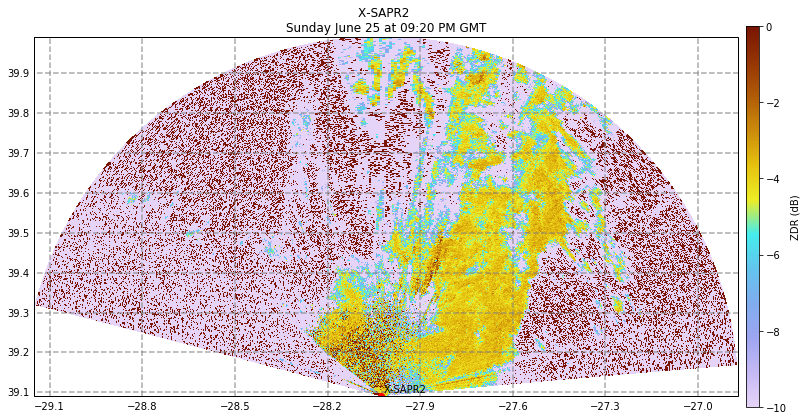

/Users/scollis/anaconda/envs/houston/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-07-11 09:09:06.930606. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [60]:
plot_xsapr2(ena_radar2, field = 'ZDR', cmap=pyart.graph.cm.LangRainbow12, vmin=-10., vmax=0)